### Need to do the following:
* Convert the accelerometer data (each row) to a time-domain signal
* Get .wav files of each recording (i.e., of each .csv file)

In [37]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
warnings.filterwarnings('ignore')

In [38]:
# load the dataset 0.csv -- script can be written to repeat for all files
df = pd.read_csv('0.csv', header=None)

# column names should be "Datetime", "UNIX_Timestamp", "second", "x", "y", "z"
df.columns = ['Datetime', 'UNIX_Timestamp', 'second', 'x', 'y', 'z']

df.head()
print(len(df))

1348


<AxesSubplot: xlabel='UNIX_Timestamp', ylabel='x'>

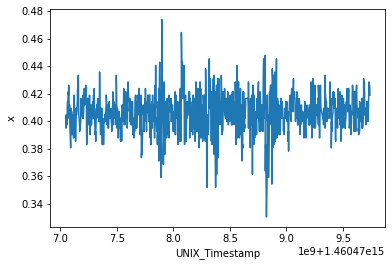

In [39]:
sns.lineplot(y = 'x', x = 'UNIX_Timestamp', data = df)

<AxesSubplot: xlabel='UNIX_Timestamp', ylabel='y'>

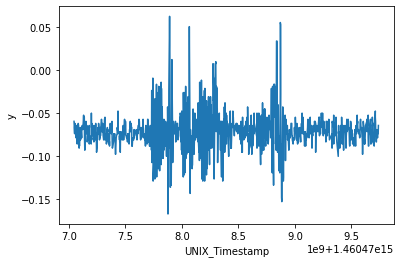

In [40]:
sns.lineplot(y = 'y', x = 'UNIX_Timestamp', data = df)

<AxesSubplot: xlabel='UNIX_Timestamp', ylabel='z'>

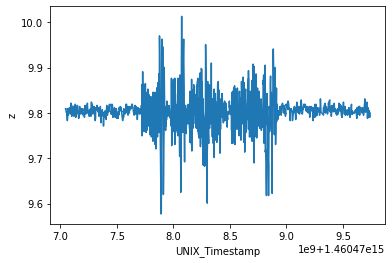

In [41]:
sns.lineplot(y = 'z', x = 'UNIX_Timestamp', data = df)

In [42]:
# subtract 9.81 from all z values

# df['z'] = df['z'] - 9.81

In [43]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

Generated signal:  Fs = 500, x.shape = (1348,), x.dtype = float64


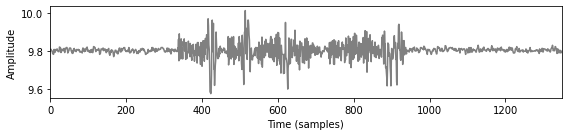

In [44]:
Fs = 500
x = df['z']
print_plot_play(x=x,Fs=Fs,text='Generated signal: ')

In [45]:
import wavio
rate = 500    # samples per second
wavio.write("test.wav", df['z'], rate, sampwidth=1)
